In [1]:
## Import Libraries ##
import os
import numpy as np
import random
import tqdm
import matplotlib.pyplot as plt
from PIL import Image, ImageEnhance
from sklearn.preprocessing import StandardScaler
from random import randrange
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report
#from xgboost import XGBClassifier

In [2]:
## Data Loading ##

# Random seed
np.random.seed(42069)

# Paths to directory
training_set_dir = "Train"
test_set_dir = "Test"

# Initialize lists for training and testing data
x_train = []
y_train = []
x_test = []
y_test = []

# Function to process a directory (Train or Test)
def process_directory(directory, is_train=True):
    image_data = []
    labels = []

    # Progress bar
    total_images = sum(len(files) for _, _, files in os.walk(directory))
    print(f'Total images to process in {directory}:', total_images)
    pbar = tqdm.tqdm(total=total_images, desc=f"Processing {directory} Images", unit="image", leave=True)

    # Image augmentation
    def augment_image(img):
        # rand_degrees = random.randint(-180, 180)
        # img_rotated = img.rotate(rand_degrees)
        # img_flipped = img.transpose(Image.FLIP_LEFT_RIGHT)
        enhancer = ImageEnhance.Brightness(img)
        brightness_increase = random.uniform(1, 1.75)
        img_bright = enhancer.enhance(brightness_increase)

        # return [img_rotated, img_flipped, img_bright]
        return [img_bright]

    # Iterate through each folder in the directory
    for subdir, dirs, files in os.walk(directory):
        for dir_name in dirs:
            dir_path = os.path.join(subdir, dir_name)
            file_names = os.listdir(dir_path)
            for file_name in file_names:
                file_path = os.path.join(dir_path, file_name)
                if file_path.endswith(('.png', '.jpg', '.jpeg')):  # Ensure it is an image file
                    img = Image.open(file_path).convert('L')
                    img = img.resize((28, 28)) # resize to 28x28
                    img_matrix = np.array(img)
                    image_data.append(img_matrix)
                    labels.append(dir_name)

                    # Augmenting images for both training and testing datasets
                    augmented_images = augment_image(img)
                    for aug_img in augmented_images:
                        aug_img_matrix = np.array(aug_img)
                        image_data.append(aug_img_matrix)
                        labels.append(dir_name)
                    
                    # Ensure enough images per digit class
                    if dir_name.isdigit():
                        while labels.count(dir_name) < 100:
                            extra_augmented_images = augment_image(img)
                            for extra_img in extra_augmented_images:
                                extra_img_matrix = np.array(extra_img)
                                image_data.append(extra_img_matrix)
                                labels.append(dir_name)
                    pbar.update(1)

    pbar.close()

    return np.array(image_data), np.array(labels)

# Process the training and test directories
x_train, y_train = process_directory(training_set_dir, is_train=True)
x_test, y_test = process_directory(test_set_dir, is_train=False)

# Flatten the data
X_train_flat = x_train.reshape(len(x_train), -1)
X_test_flat = x_test.reshape(len(x_test), -1)

print("Training data shape:", x_train.shape)
print("Training labels shape:", y_train.shape)
print("Test data shape:", x_test.shape)
print("Test labels shape:", y_test.shape)

Total images to process in Train: 28015


Processing Train Images:   0%|          | 0/28015 [00:00<?, ?image/s]

Processing Train Images: 100%|██████████| 28015/28015 [00:16<00:00, 1660.42image/s]


Total images to process in Test: 7312


Processing Test Images: 100%|██████████| 7312/7312 [00:02<00:00, 2640.81image/s]


Training data shape: (57010, 28, 28)
Training labels shape: (57010,)
Test data shape: (15604, 28, 28)
Test labels shape: (15604,)


Label = H


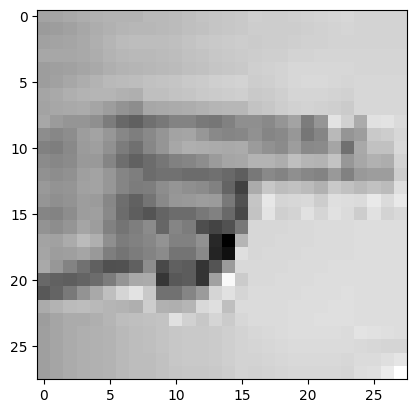

Label = H


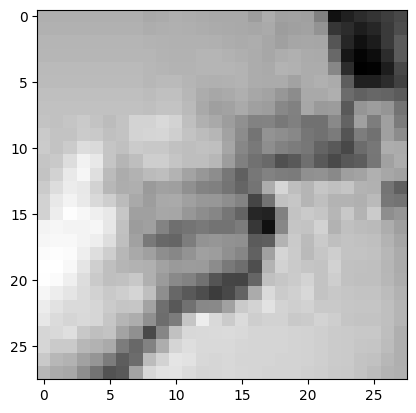

Label = I


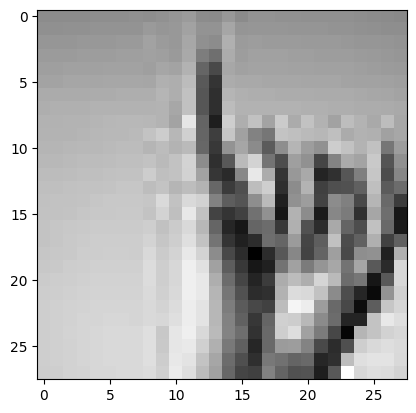

In [3]:
# Examples
plt.imshow(x_train[10000], cmap='gray') 
print('Label =',y_train[10000])
plt.show()
plt.imshow(x_train[10003], cmap='gray')
print('Label =',y_train[10003])
plt.show()
plt.imshow(x_train[4], cmap='gray')
print('Label =',y_train[4])
plt.show()

In [38]:
# Function to train and evaluate a model
def evaluate_model(model, X_train, y_train, X_test, y_test):
    try:
        model.fit(X_train, y_train) # Train the model
        y_pred = model.predict(X_test) # Predict the test data
        accuracy = accuracy_score(y_test, y_pred) # Calculate accuracy
        print(f"Accuracy: {accuracy}")
        print("Classification Report:")
        print(classification_report(y_test, y_pred))
        return model 
    except Exception as e:
        print(f"Error during model training: {e}")
        return None

# Models
models = [
    ("RandomForestClassifier", RandomForestClassifier())
    # ("KNeighborsClassifier", KNeighborsClassifier()),
    # ("LogisticRegression", LogisticRegression(max_iter=1000)),
    # ("MultinomialNB", MultinomialNB()),
]

# Evaluate models
trained_models = {} # to store trained models
for model_name, model in models:
    print(f"Evaluating {model_name}")
    trained_model = evaluate_model(model, X_train_flat, y_train, X_test_flat, y_test)
    if trained_model:
        trained_models[model_name] = trained_model

Evaluating RandomForestClassifier
Accuracy: 0.7081898834745762
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.81      0.88       152
           1       0.99      0.92      0.95       152
           2       0.83      0.83      0.83       152
           3       0.86      0.86      0.86       152
           4       0.66      0.29      0.40       152
           5       0.53      0.87      0.66       152
           6       0.70      0.87      0.78       152
           7       0.91      0.83      0.87       152
           8       0.87      0.83      0.85       152
           9       0.87      0.91      0.89       152
           A       0.81      0.93      0.86      1324
           B       0.93      0.80      0.86      1728
           C       0.88      0.93      0.91      1240
           D       0.70      0.84      0.76       980
           E       0.89      0.84      0.86      1992
           F       0.75      0.83      0.79      

In [4]:
## Neural Network ##
scalar = StandardScaler()

# fit to training data
scalar.fit(X_train_flat)
StandardScaler(copy=True, with_mean=True, with_std=True)

# transform training data
X_train_scaled = scalar.transform(X_train_flat)
X_test_scaled = scalar.transform(X_test_flat)

# specify model
mlp = MLPClassifier(max_iter=1000, random_state=42)

# create grid
grid = {
    'hidden_layer_sizes': [(250, 250), (100, 100), (50, 50)],
    'activation': ['relu'],
    'solver': ['adam'],
    'alpha': [0.06, 0.01, 0.001, 0.02],
    'learning_rate': ['adaptive'],
}

grid_search = GridSearchCV(mlp, grid, n_jobs=-1)

# fit model
grid_search.fit(X_train_scaled, y_train)

# retrieve best model
mlp_best = grid_search.best_estimator_

# predict
y_pred_mlp = mlp_best.predict(X_test_scaled)
accuracy_mlp = accuracy_score(y_test, y_pred_mlp)
print(f"Accuracy: {accuracy_mlp}")
print("Classification Report:")
print(classification_report(y_test, y_pred_mlp))

Accuracy: 0.8176749551397078
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       126
           1       1.00      0.98      0.99       126
           2       1.00      0.99      1.00       126
           3       1.00      0.78      0.88       126
           4       0.99      1.00      1.00       126
           5       0.82      1.00      0.90       126
           6       0.97      1.00      0.98       126
           7       1.00      0.98      0.99       126
           8       1.00      1.00      1.00       126
           9       1.00      0.98      0.99       126
           A       0.84      0.97      0.90       662
           B       0.94      0.95      0.94       864
           C       0.78      1.00      0.87       620
           D       0.93      0.98      0.96       490
           E       0.91      0.99      0.95       996
           F       0.73      0.91      0.81       494
           G       0.86      

In [5]:
mlp_best
# .76, (50,50), 0.01
# .78, (50,50), 0.02
# .79, (100,100), 0.025
# .80, (150, 150, 150), 0.05
# .81, (150,150), 0.03
# .83, (200,200), 0.05
# .82, (250,250), 0.06


MLPClassifier(alpha=0.06, hidden_layer_sizes=(250, 250),
              learning_rate='adaptive', max_iter=1000, random_state=42)

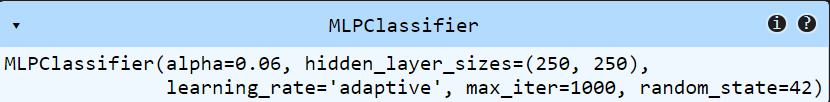

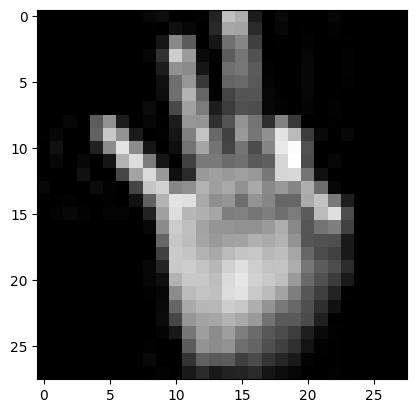

The predicted class for the image is: 9


In [45]:
## Display Image ##

def preprocess_image(image_path):
    img = Image.open(image_path).convert('L')
    img = img.resize((28, 28))
    img_array = np.array(img)
    return img_array

# Path to your image
image_path = '../data/Test/K/2_K.jpeg'

# Load the trained RandomForestClassifier model
rf_model = trained_models.get("RandomForestClassifier")

if rf_model:
    # Preprocess the image
    preprocessed_image = preprocess_image(image_path)

    plt.imshow(preprocessed_image, cmap='gray')
    plt.show()
    # Predict the class
    predicted_class = rf_model.predict(preprocessed_image.reshape(1,-1))[0]
    print(f'The predicted class for the image is: {predicted_class}')
else:
    print("RandomForestClassifier model was not successfully trained.")